# Regularization

Regularization is one of the techniques to solve the Overfitting problem, by adding a regularize part to the cost function in the training, but this regulaized term is different and we will here to see one of these regularization.

- Test Ridge Regression (L2 Norm)

# Overfitting

Lets first go throw overfitting problem, when you give your model the freedom to learn every thing about the data, it seems that you will never go well on the new data as you tweek the paramter for each training exampel, and this is not gernlize to the new instance you will test the model with, this is because some instance you will have in the training maybe is just a noise instance or it appear once and your paramters are tweeked also for these noise, so some of the soluation for this problem is to constrain your model like:

- using less degree instead of high polynomial degree
- using more training examples
-  and add regularied part

As we can see maybe it can be solved based on what model you used so for poly may be less degree will solve your problem, but what if we used plain linear regression without any polynomial features ? so we need to change these weights little bit away on its tweaked based on the learning, and for this we add ridge term to the cost function.

<img src="ridgecost.png" height="400" width="400">


As we can see the part after + is the ridge term and we can see lambda with is the regulaized control term, and if we leave it = 0 there no regulaization added, and if it too high the weights will approximately to 0 and we will move to underfitting problem, so we need to control it for generalization.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import SGDRegressor, Ridge
%matplotlib inline

In [2]:
df = pd.read_csv('csv_files/ex1data1.csv')
df.head()

,city_population,food_truck_profit
0,6.1101,17.5920
1,5.5277,9.1302
2,8.5186,13.6620
3,7.0032,11.8540
4,5.8598,6.8233


Text(0, 0.5, 'food_truck_profit')

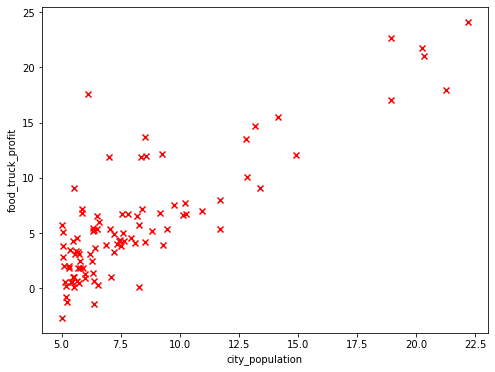

In [3]:
plt.figure(figsize=(8,6))
plt.scatter(df['city_population'], df['food_truck_profit'], c='r',marker='x')
plt.xlabel('city_population')
plt.ylabel('food_truck_profit')

In [4]:
def init_2d_graphs(*colors):
    plt.style.use(colors) # color of your 2d graph
    plt.figure(figsize=(10,6)) # set the figure size
    return True
init_2d_graphs('ggplot' )

True

<Figure size 720x432 with 0 Axes>

In [5]:
def display(thets_1, costs):
    plt.figure(figsize=(10, 6))
    plt.scatter(thets_1,costs, c='r', s=100, marker='.')
    plt.plot(thets_1,costs,  linewidth=2)
    plt.xlabel("thets_1")
    plt.ylabel("Cost")

In [6]:
def graph_fit_line(thets_0, thets_1):
    # Plot the graph with first 4 values of thetas and last values of thetas
    plt.figure(figsize=(10, 6))
    for i in range(3):
        y_hat = np.matmul(X, np.array([thets_0[i], thets_1[i]]).reshape(-1,1))
        plt.plot(X[:, 1], y_hat, label='predict ' + str(i+1), linewidth=2)
    y_hat = np.matmul(X, np.array([thets_0[-1], thets_1[-1]]).reshape(-1,1))
    plt.plot(X[:, 1], y_hat, label= 'last predict',linewidth=2)

    plt.scatter(X[:, 1],y, s = 100, c = 'r', marker = 'X', label =  'Training data')

    plt.title("The Relation between " + 'Population of City in 10,000s' + " And " + 'Profit in $10,000s' )
    plt.legend()
    plt.xlabel('Population of City in 10,000s')
    plt.ylabel('Profit in $10,000s')

In [7]:
def intilize():
    X = np.array(df['city_population'])
    y = np.array(df['food_truck_profit'])
    X = X.reshape(-1, 1)
    print(X.shape)

    # Add x0
    X = np.c_[np.ones((X.shape[0], 1)), X]

    y = y.reshape(-1, 1)
    X_T = X.T
    thets_0 = []
    thets_1 = []
    costs = []
    grd_vector = []
    
    
    print(X.shape)
    print(y.shape)
    print(X_T.shape)
    
    return X, y, X_T, thets_0, thets_1, costs, grd_vector

In [8]:
X, y, X_T, thets_0, thets_1, costs, grd_vector =  intilize()
thetas_batch = np.zeros((2, 1))
print(thetas_batch.shape)

(97, 1)
(97, 2)
(97, 1)
(2, 97)
(2, 1)


In [9]:
thetas_batch[1:] * thetas_batch[1:]

array([[0.]])

In [10]:
def cost_function(X, y, thetas_batch):
    m = X.shape[0]
    
    j = (1/(2*m)) * np.matmul((X.dot(thetas_batch) - y).T, (X.dot(thetas_batch) - y))
    return j.reshape(-1)[0]

# Test Ridge Regression from scratch

Lets use the optimal learning rate from the notebook **Learning Rate effect with stochastic Gradient & Mini-Batch**, to know the effect of lambda as we mentioned above and see the behaviour on the graph from 0 value to large value.

In [11]:
def ridge_regression(X, y, thetas_batch, l2_pleynty, learning_rate, iterations = 10):
    m = X.shape[0]
    
    for i in range(iterations):
        
        '''
        You need to compute the gradient of the cost function with regard to each parameter theta,
        in other words, you need to calculate how much the cost function will change if you change theta,
        just a little bit. this is called the partial derivative.
        '''
        
        ridge_term =  (l2_pleynty * (np.sum(thetas_batch[1:] * thetas_batch[1:])))
        graident_vector = (1/m) * ( (X.T.dot(X.dot(thetas_batch) - y)) + ridge_term)
        
        thetas_batch = thetas_batch - (learning_rate * graident_vector)
        grd_vector.append(round(graident_vector[1][0], 2))
        thets_0.append(round(thetas_batch[0][0],2))
        thets_1.append(round(thetas_batch[1][0],2))
        costs.append(round(cost_function(X,y, thetas_batch),2))
    
    return costs, thets_0, thets_1


# with 0 value for lambda hyperparameter

With 0 value you have not make any regularization to the model and it still plain regression model.

In [12]:
X, y, X_T, thets_0, thets_1, costs, grd_vector =  intilize()
thetas_batch = np.zeros((2, 1))
print(thetas_batch.shape)
thets_0.append(thetas_batch[0][0])
thets_1.append(thetas_batch[1][0])
costs.append(cost_function(X,y, thetas_batch))
costs, thets_0, thets_1 = ridge_regression(X, y, thetas_batch,0, .01, 10) 

(97, 1)
(97, 2)
(97, 1)
(2, 97)
(2, 1)


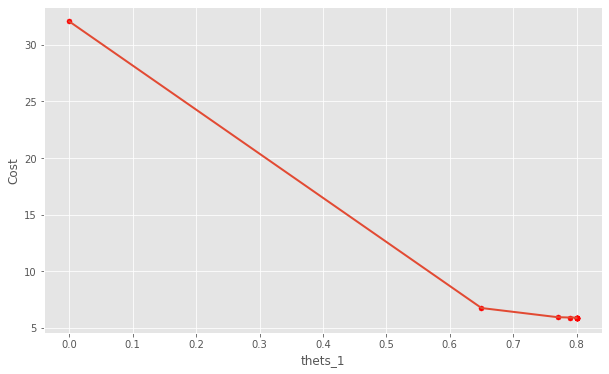

In [13]:
display(thets_1, costs)

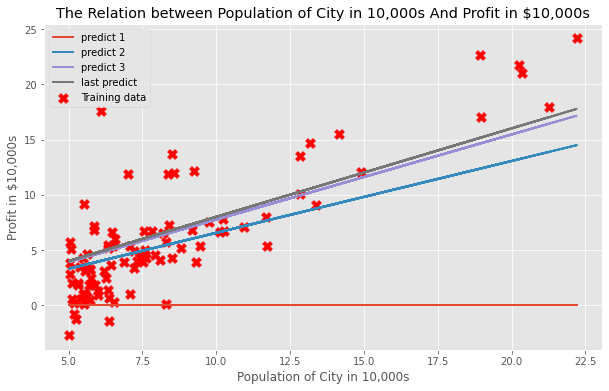

In [14]:
graph_fit_line(thets_0, thets_1)

# With 11500 value for lambda hyperparameter

lets put large value for lambda to see how long value affect the weights we get at the end to be approximate to 0 values, and the problem moved from overfitting too underfitting and as we can see last prediction with updated weight is a flat line.

In [15]:
X, y, X_T, thets_0, thets_1, costs, grd_vector =  intilize()
thetas_batch = np.zeros((2, 1))
print(thetas_batch.shape)
thets_0.append(thetas_batch[0][0])
thets_1.append(thetas_batch[1][0])
costs.append(cost_function(X,y, thetas_batch))
costs, thets_0, thets_1 = ridge_regression(X, y, thetas_batch,11500, .01, 10)

(97, 1)
(97, 2)
(97, 1)
(2, 97)
(2, 1)


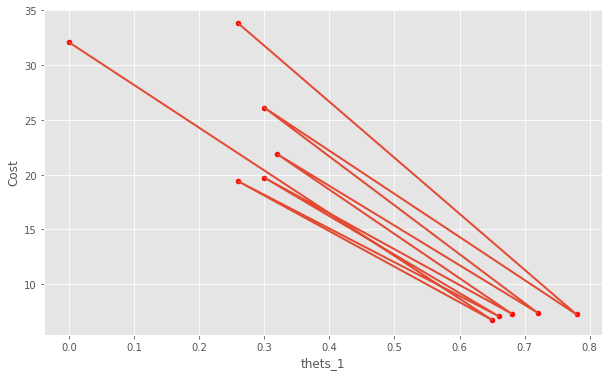

In [16]:
display(thets_1, costs)

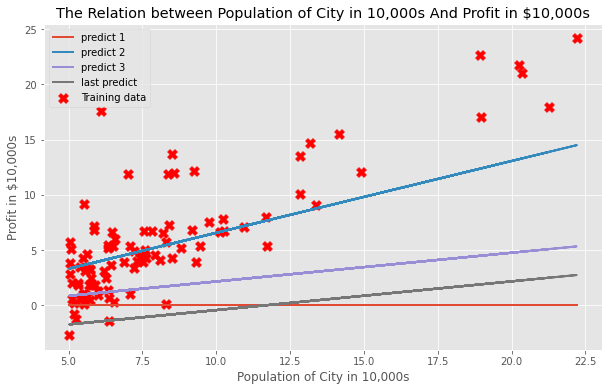

In [17]:
graph_fit_line(thets_0, thets_1)

# Using sklearn

We can use the ridge eather with gradient descent or with **closed form (normal equation)**

In [18]:
# ridge regression is l2 norm
sgd_reg = SGDRegressor(penalty="l2")

In [19]:
X, y, X_T, thets_0, thets_1, costs, grd_vector =  intilize()
sgd_reg.fit(X,y.ravel())

(97, 1)
(97, 2)
(97, 1)
(2, 97)


SGDRegressor()

In [20]:
 # compare .96 to what we have for theta_1 when lambda was 0 theta_1 was about .8 and large value
sgd_reg.coef_

array([-1.56353893,  1.12723145])

# With Normal Equation

In [21]:
ridge_reg = Ridge(solver="cholesky")
X, y, X_T, thets_0, thets_1, costs, grd_vector =  intilize()
ridge_reg.fit(X,y.ravel())
sgd_reg.coef_

(97, 1)
(97, 2)
(97, 1)
(2, 97)


array([-1.56353893,  1.12723145])

# Summary

So as we can see that, ridge regression add another hyperparameter you need to set, the best way is to trying to zoom out for different values large and small values, then once you find it work well for some values zoom in the range of these values to get the best value for the hyperparameter.

As we can see also 0 for lambda hyperparam means no regression as multiplication of 0 is 0, and it should not be too large because it will cause to underfitting (move from problem to another one), so try zoom out and then zoom in for best choice for using random search algorithm.

Another is Lasso Regression, Elastic and others.

# Lasso Regression

Instead of using L2 norm with Ridge, this time we will use l1 Norm or what is called **Least Absolute Shrinkage and selection Operator** Lasso Regression.

Its the same as Ridge by add the regression term to the cost function.

<img src="lasso.jpg">

Lasso regression as from its name least absolute, it try to set the weights associated with the least important features to 0, its doing feature selection .

**Use Lasso instead of Ridge with sklearn and l1 instead of l2 with SGDRegressor**

# Elastic Net Regression

Elastic work in the middle between Lasso and Ridge and there is a parameter called l1_ratio, you can set to 0 and in this case it equivalent to Ridge and to 1 for Lasso and between 0 and 1 is the ratio of using l1 and l2 norm.

<img src="elastic_net.png">

# Early Stopping

Is another way of regularization by plotting or see how the loss function going between training and validation, and once it start to go up again on the validation after it reach the minum then the model start to overfit the data, and you need to stop the learning.

<img src="Early-stopping-based-on-cross-validation.pbm.png">